In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogsvscats")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'dogsvscats' dataset.
Path to dataset files: /kaggle/input/dogsvscats


In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import (
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    BatchNormalization,
    Dropout,
)

In [16]:
train_ds = keras.utils.image_dataset_from_directory(
    directory=f"{path}/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=f"{path}/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
# normalization layer
def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
# create CNN model

model = Sequential()

model.add(
    Conv2D(
        32,
        kernel_size=(3, 3),
        padding="valid",
        activation="relu",
        input_shape=(256, 256, 3),
    )
)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))


model.add(
    Conv2D(
        64,
        kernel_size=(3, 3),
        padding="valid",
        activation="relu",
    )
)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))


model.add(
    Conv2D(
        128,
        kernel_size=(3, 3),
        padding="valid",
        activation="relu",
    )
)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [21]:
history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 90ms/step - accuracy: 0.5588 - loss: 2.8849 - val_accuracy: 0.6684 - val_loss: 0.6276
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.6778 - loss: 0.6189 - val_accuracy: 0.6290 - val_loss: 0.6383
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.7369 - loss: 0.5284 - val_accuracy: 0.7320 - val_loss: 0.5244
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.7753 - loss: 0.4732 - val_accuracy: 0.7868 - val_loss: 0.4514
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.8206 - loss: 0.3997 - val_accuracy: 0.7666 - val_loss: 0.5219
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.8500 - loss: 0.3422 - val_accuracy: 0.5782 - val_loss: 1.0519
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.8843 - loss: 0.2707 - val_accuracy: 0.8088 - val_loss: 0.4966
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.9269 - loss: 0.1784 - 

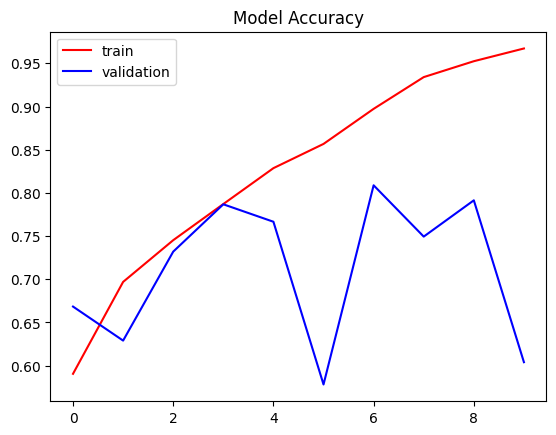

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="train", color="red")
plt.plot(history.history["val_accuracy"], label="validation", color="blue")

plt.legend()
plt.title("Model Accuracy")
plt.show()

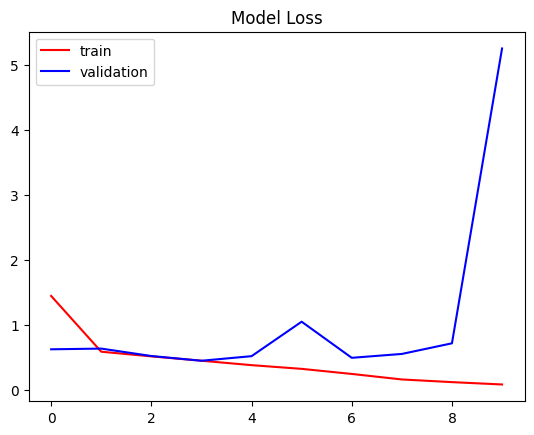

In [26]:
plt.plot(history.history["loss"], label="train", color="red")
plt.plot(history.history["val_loss"], label="validation", color="blue")

plt.legend()
plt.title("Model Loss")
plt.show()